<a href="https://colab.research.google.com/github/Mauroreis100/PerformacePredictor/blob/main/Employee_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

In [ ]:
df.head(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False


In [ ]:
ineffective_features = ["Employee_ID","Hire_Date"]
df = df.drop(columns = ineffective_features, axis = 1 )

In [ ]:
label_encoders = {}
for column in ["Department","Gender", "Job_Title", "Education_Level"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
df.head(3)

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,4,1,55,5,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,1,29,2,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,2,1,55,5,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Carregar os dados
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

# Selecionar colunas relevantes
features = ["Monthly_Salary","Work_Hours_Per_Week", "Overtime_Hours", "Projects_Handled", "Sick_Days",
            "Remote_Work_Frequency", "Training_Hours", "Employee_Satisfaction_Score",
            "Team_Size", "Promotions", "Years_At_Company"]
target = "Performance_Score"

# Remover valores nulos
df = df.dropna()

# Separar variáveis explicativas (X) e variável alvo (y)
X = df[features]
y = df[target]

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Guardar o modelo e o scaler
joblib.dump(model, "productivity_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Modelo treinado e guardado com sucesso!")


<ipython-input-4-4b2aecbd08c8>:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")


MAE: 0.13
MSE: 0.15
R² Score: 0.92
Modelo treinado e guardado com sucesso!


In [ ]:
import joblib
import numpy as np

# Carregar o modelo treinado e o scaler
model = joblib.load("productivity_model.pkl")
scaler = joblib.load("scaler.pkl")

# Novo colaborador (substituir pelos dados reais)
new_employee = np.array([[3000,40, 5, 15, 2, 50, 20, 3.5, 10, 1, 5]])

# Normalizar os dados
new_employee_scaled = scaler.transform(new_employee)

# Fazer previsão
predicted_score = model.predict(new_employee_scaled)
print(f"Produtividade prevista: {predicted_score[0]:.2f}")


Produtividade prevista: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

# Resumo estatístico
describe = df.describe()

# Visualizar correlação
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()

# Distribuição da produtividade
sns.histplot(df["Performance_Score"], bins=10, kde=True)
plt.title("Distribuição da Produtividade")
plt.show()

print(describe)


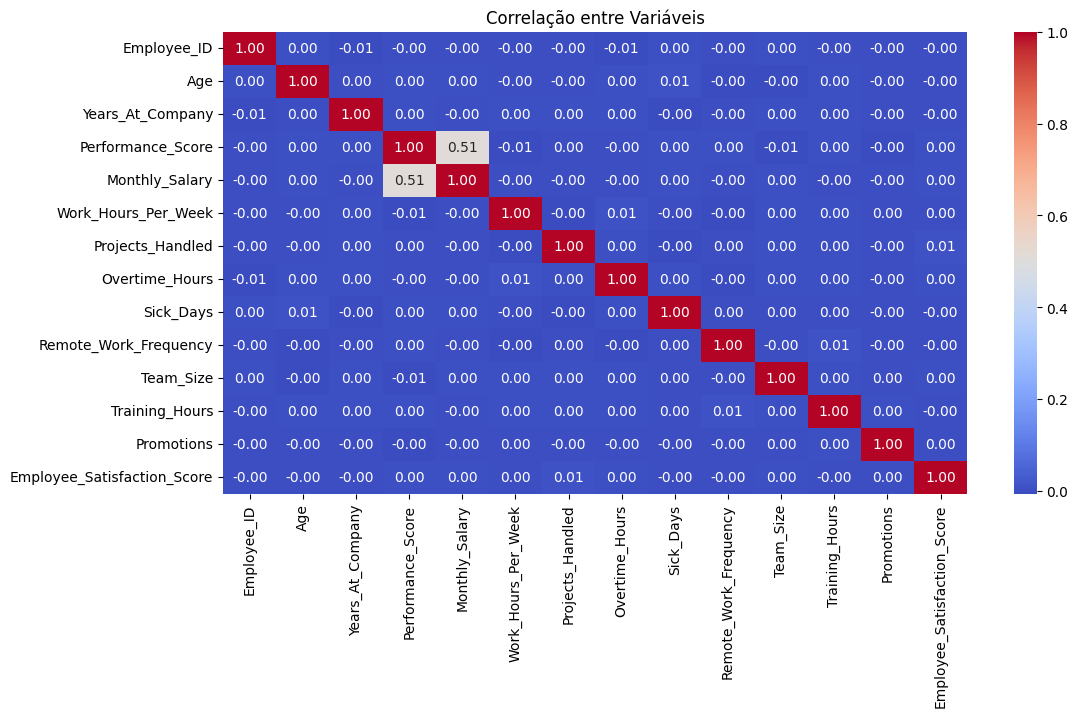

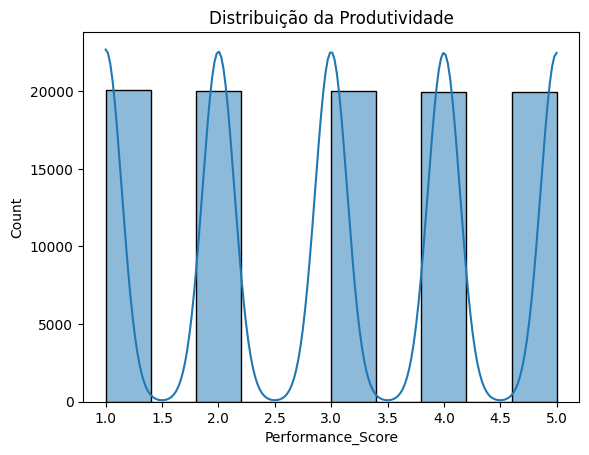

         Employee_ID            Age  Years_At_Company  Performance_Score  \
count  100000.000000  100000.000000     100000.000000      100000.000000   
mean    50000.500000      41.029410          4.476070           2.995430   
std     28867.657797      11.244121          2.869336           1.414726   
min         1.000000      22.000000          0.000000           1.000000   
25%     25000.750000      31.000000          2.000000           2.000000   
50%     50000.500000      41.000000          4.000000           3.000000   
75%     75000.250000      51.000000          7.000000           4.000000   
max    100000.000000      60.000000         10.000000           5.000000   

       Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  \
count   100000.000000        100000.000000     100000.000000   100000.000000   
mean      6403.211000            44.956950         24.431170       14.514930   
std       1372.508717             8.942003         14.469584        8.66402

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

# Selecionar apenas colunas numéricas para calcular a correlação
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

# Resumo estatístico
describe = df.describe()

# Visualizar correlação
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()

# Distribuição da produtividade
sns.histplot(df["Performance_Score"], bins=10, kde=True)
plt.title("Distribuição da Produtividade")
plt.show()

print(describe)